In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

To calculate these errors, we overlay two of the same eigenmode, normalize them, and then find the root mean squared difference.

In [21]:
eigenmode_data_filenames = [
    'data/15_710_718_0.2.npy',
    'data/15_711_717_0.2.npy',
    'data/15_711_717_1.0.npy']
eigenmode_data = [np.load(filename) for filename in eigenmode_data_filenames]

Now we calculate the index where each file should have its 712 Hz data:

In [22]:
indices_of_712_Hz = [
    np.argmin(np.abs(np.arange(710, 718.01, 0.2)-712.0)),
    np.argmin(np.abs(np.arange(711, 717.01, 0.2)-712.0)),
    np.argmin(np.abs(np.arange(711, 717.01, 1.0)-712.0))]

Here are all the maps at the same frequency:

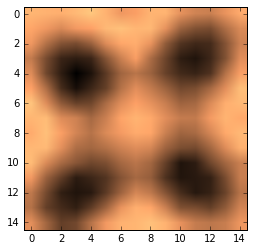

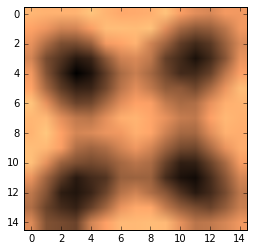

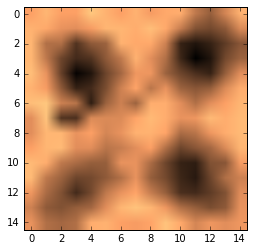

In [34]:
for i in range(3):
    plt.imshow(eigenmode_data[i][:, :, indices_of_712_Hz[i]], cmap='copper_r')
    plt.show()

Now, let's normalize them, and get a standard deviation for each. 

In [38]:
equal_frequency_data = [eigenmode_data[i][:, :, indices_of_712_Hz[i]] for i in range(3)]
normalized_maps = np.array([equal_frequency_data[i]/np.sum(equal_frequency_data[i]) for i in range(3)])

Then, we weight the standard deviation by the amplitude in an average over the whole plate (i.e., larger amplitude values should have better estimates for the amplitude uncertainty).

In [55]:
standard_deviation_pointwise = np.std(normalized_maps, 0)/np.average(normalized_maps, 0)
weighted_average_standard_deviation = np.average(
    standard_deviation_pointwise,weights=np.average(normalized_maps, 0))

So, we find the amplitude relative error to be:

In [56]:
weighted_average_standard_deviation

0.11455035744440006

So about 10% relative error. If we did not weight this, we would find:

In [57]:
np.average(standard_deviation_pointwise)

0.15798362945613842

The fact that this is larger seems reasonable because smaller amplitude values would likely have higher standard deviations. 